In [1]:
# create a radom model for test
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(8, (9, 9), activation='relu', input_shape=(512, 512, 3)))
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.Conv2D(16, (7, 7), strides=(4,4),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Fully connected layers
model.add(layers.Flatten())
# model.add(layers.Dense(10, activation='relu')) removed for now to keep the network simple and fast 
model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 504, 504, 8)       1952      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 16)        6288      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3600)              0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [2]:
import tensorflow as tf

model = tf.keras.models.load_model('CNN-exp')

# Check its architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 123210)            0         
                                                                 
 dense (Dense)               (None, 15)                1848165   
                                                                 
 dense_1 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1,848,461
Trainable params: 1,848,461
Non-trainable params: 0
______________________________________________

In [3]:
import datasets
import numpy as np

ds_tf = datasets.load_from_disk("ds-tf-224")

c:\Users\Tim\miniconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
input = ds_tf["train"][3:4]["image"]
input = tf.convert_to_tensor(input.numpy(), dtype=float)

In [5]:
true_label = ds_tf["test"]["label"]

In [6]:
# eval test set
from tqdm import tqdm
# confusion matrix
predictions = []
res = model.predict(ds_tf["test"]["image"], batch_size=10)
#predictions = [int(np.array(tf.nn.softmax(pred, axis=-1))[0]) for pred in res]
predictions = [(0 if pred < 0.5 else 1) for pred in res]

100/100 [==============================] - 4s 3ms/step


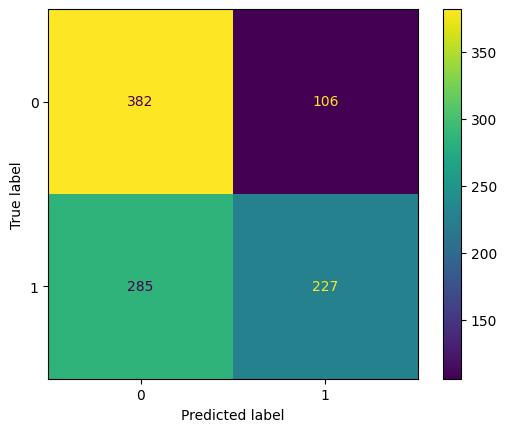

{'0': {'precision': 0.5727136431784108,
  'recall': 0.7827868852459017,
  'f1-score': 0.6614718614718614,
  'support': 488.0},
 '1': {'precision': 0.6816816816816816,
  'recall': 0.443359375,
  'f1-score': 0.5372781065088758,
  'support': 512.0},
 'accuracy': 0.609,
 'macro avg': {'precision': 0.6271976624300462,
  'recall': 0.6130731301229508,
  'f1-score': 0.5993749839903686,
  'support': 1000.0},
 'weighted avg': {'precision': 0.6285052788920855,
  'recall': 0.609,
  'f1-score': 0.5978846589308128,
  'support': 1000.0}}

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


cm = confusion_matrix(true_label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()
classification_report(true_label, predictions, output_dict=True)


In [ ]:
res = model(input)
np.array(tf.nn.softmax(res, axis=-1))

array([[1.]], dtype=float32)

In [ ]:
from tensorflow.keras import backend as K
layerIndex = 1
func = K.function([model.get_layer(index=0).input], model.get_layer(index=layerIndex).output)
layerOutput = func([np.array(input)])  # input_data is a numpy array
print(layerOutput)

[[[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  ...

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 

In [19]:
model(input)[0][0]

<tf.Tensor: shape=(), dtype=float32, numpy=0.6373942>

In [11]:
input = ds_tf["test"][4:5]["image"]
input = tf.convert_to_tensor(input.numpy(), dtype=float)
type(input[0])

tensorflow.python.framework.ops.EagerTensor

In [24]:
input

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[ 61.,  48.,  30.],
         [ 59.,  46.,  28.],
         [ 57.,  44.,  25.],
         ...,
         [ 68.,  53.,  50.],
         [ 67.,  52.,  49.],
         [ 68.,  53.,  50.]],

        [[ 59.,  46.,  29.],
         [ 57.,  44.,  27.],
         [ 54.,  41.,  24.],
         ...,
         [ 68.,  53.,  50.],
         [ 67.,  52.,  49.],
         [ 68.,  53.,  50.]],

        [[ 57.,  44.,  28.],
         [ 55.,  42.,  26.],
         [ 53.,  40.,  23.],
         ...,
         [ 68.,  53.,  50.],
         [ 67.,  52.,  49.],
         [ 68.,  53.,  50.]],

        ...,

        [[ 33.,  46.,  36.],
         [ 34.,  47.,  37.],
         [ 35.,  48.,  38.],
         ...,
         [ 30.,  33.,  58.],
         [ 36.,  39.,  65.],
         [ 45.,  48.,  75.]],

        [[ 26.,  39.,  29.],
         [ 27.,  40.,  30.],
         [ 29.,  42.,  32.],
         ...,
         [ 33.,  38.,  61.],
         [ 66.,  72.,  99.],
         

In [12]:
def compute_gradients(images):
  with tf.GradientTape() as tape:
    tape.watch(images)
    logits = model(images)
    #probs = tf.nn.softmax(logits, axis=-1)[:, target_class_idx]
    probs = logits[0][0]
    #print(probs)
  return tape.gradient(probs, images)
grads = compute_gradients(input)

C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:10: RuntimeWarning: divide by zero encountered in divide
  normalized =  absolute * (255.0/absolute.max())
C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:10: RuntimeWarning: invalid value encountered in multiply
  normalized =  absolute * (255.0/absolute.max())
C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:11: RuntimeWarning: invalid value encountered in cast
  integ = normalized.astype(np.uint8)


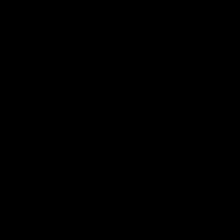

In [129]:
from PIL import Image
import numpy as np
#import torch

def array_to_img(arr):
    imgdata = np.array(arr)
    #transpose = np.transpose(np.array(imgdata), (1,2,0))
    absolute = np.absolute(imgdata)
    #avg_abs = np.average(imgdata,axis=2)
    normalized =  absolute * (255.0/absolute.max())
    integ = normalized.astype(np.uint8)

    img = Image.fromarray(integ, 'RGB')
    return img

array_to_img(grads[0])

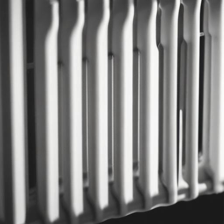

In [14]:
array_to_img(ds_tf["train"][4]["image"])

In [20]:
def preprocess_image(img):
    width, height = img.size
    target_size = min(width, height)
    left = max(0, (width - target_size ) // 2)
    right = left + target_size
    top = max(0, (height - target_size ) // 2)
    bottom = top + target_size
    crop = img.crop((left, top, right, bottom)).convert('RGB')
    resize = crop.resize((224,224))
    return resize

logits:  tf.Tensor([[0.9999963]], shape=(1, 1), dtype=float32)
Predicted class: 1


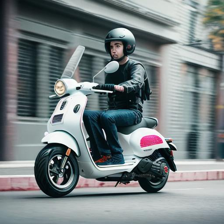

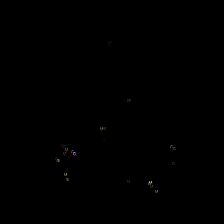

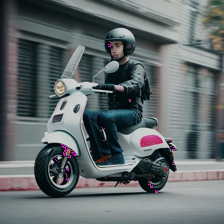

In [229]:
def analyse_image(path=None, img=None):
    if path is not None:
        image = Image.open(path)    
    elif img is not None:
        image = img 
    image = image.convert('RGB')

    image = preprocess_image(image)

    inputs = tf.convert_to_tensor(np.array([image]), dtype=float)

    grads = compute_gradients(inputs)

    outputs = model(inputs)

    print("logits: ", outputs)

    print("Predicted class:", 1 if outputs > 0.5 else 0)

    display(array_to_img(inputs[0]))
    display(array_to_img(grads[0]))
    
    # color_vector = np.array((255.0,0.0,255.0)) # do not go over 1 ?!
    # colored_grads = np.apply_along_axis(lambda x: np.mean(x), 2, np.array(grads[0]))

    color_matrix = np.array(  224*[224*[[255.0,0.0,255.0]]]  )
    ratio = np.apply_along_axis(lambda x: np.mean(x)//255*np.array([1.0,1.0,1.0]), 2, np.array(grads[0]))

    joint = inputs[0] * ( 1 - ratio) + color_matrix * ratio

    display(array_to_img(joint))

analyse_image("36_motor scooter.jpg")

logits:  tf.Tensor([[0.46676868]], shape=(1, 1), dtype=float32)
Predicted class: 0


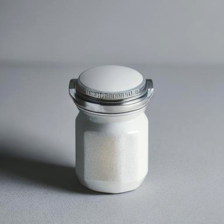

C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:10: RuntimeWarning: divide by zero encountered in divide
  normalized =  absolute * (255.0/absolute.max())
C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:10: RuntimeWarning: invalid value encountered in multiply
  normalized =  absolute * (255.0/absolute.max())
C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:11: RuntimeWarning: invalid value encountered in cast
  integ = normalized.astype(np.uint8)


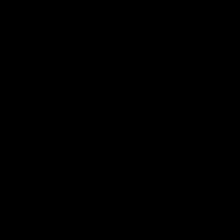

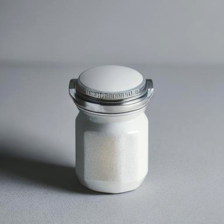

In [230]:
analyse_image("2980_saltshaker.jpg")

logits:  tf.Tensor([[0.9999963]], shape=(1, 1), dtype=float32)
Predicted class: 1


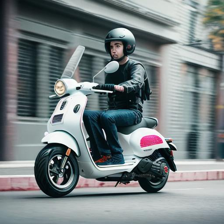

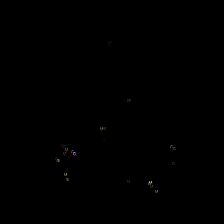

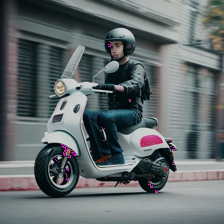

In [231]:
analyse_image("36_motor scooter.jpg")

logits:  tf.Tensor([[0.46676868]], shape=(1, 1), dtype=float32)
Predicted class: 0


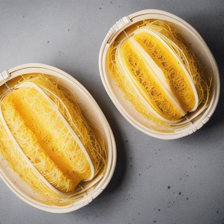

C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:10: RuntimeWarning: divide by zero encountered in divide
  normalized =  absolute * (255.0/absolute.max())
C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:10: RuntimeWarning: invalid value encountered in multiply
  normalized =  absolute * (255.0/absolute.max())
C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:11: RuntimeWarning: invalid value encountered in cast
  integ = normalized.astype(np.uint8)


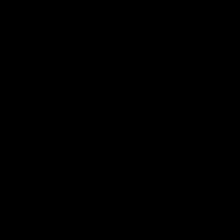

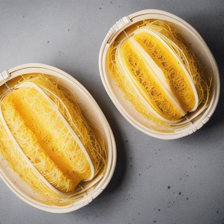

In [232]:
analyse_image("37_spaghetti squash.jpg")

logits:  tf.Tensor([[0.95833534]], shape=(1, 1), dtype=float32)
Predicted class: 1


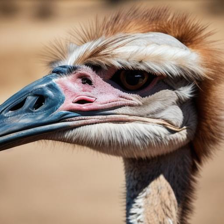

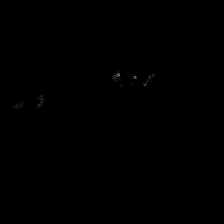

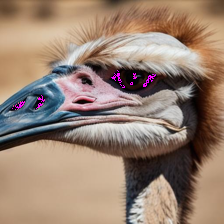

In [233]:
analyse_image("38_ostrich.jpg")

logits:  tf.Tensor([[1.]], shape=(1, 1), dtype=float32)
Predicted class: 1


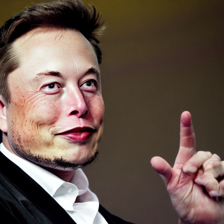

C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:10: RuntimeWarning: divide by zero encountered in divide
  normalized =  absolute * (255.0/absolute.max())
C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:10: RuntimeWarning: invalid value encountered in multiply
  normalized =  absolute * (255.0/absolute.max())
C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:11: RuntimeWarning: invalid value encountered in cast
  integ = normalized.astype(np.uint8)


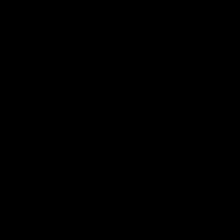

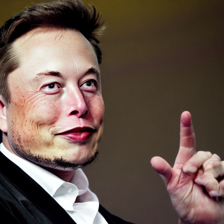

In [234]:
analyse_image("elon2.png")

logits:  tf.Tensor([[0.998741]], shape=(1, 1), dtype=float32)
Predicted class: 1


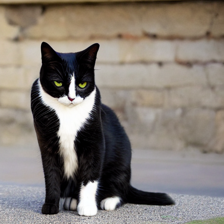

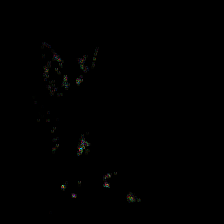

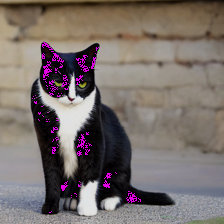

In [235]:
analyse_image("french_cat.png")

In [45]:
from datasets import load_dataset, load_from_disk, interleave_datasets
ds = load_from_disk("../../data/diffusion_and_real/")

true_label 0
logits:  tf.Tensor([[0.46676868]], shape=(1, 1), dtype=float32)
Predicted class: 0


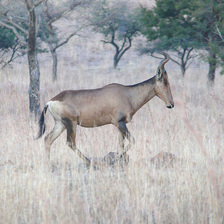

C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:10: RuntimeWarning: divide by zero encountered in divide
  normalized =  absolute * (255.0/absolute.max())
C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:10: RuntimeWarning: invalid value encountered in multiply
  normalized =  absolute * (255.0/absolute.max())
C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:11: RuntimeWarning: invalid value encountered in cast
  integ = normalized.astype(np.uint8)


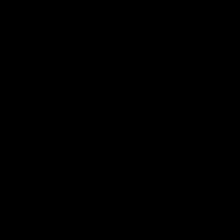

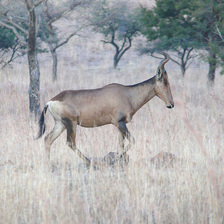

In [236]:
index = 0
print("true_label", ds["test"][index]["label"])
analyse_image(img=ds["test"][index]["image"])

true_label 0
logits:  tf.Tensor([[0.46676868]], shape=(1, 1), dtype=float32)
Predicted class: 0


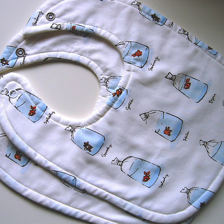

C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:10: RuntimeWarning: divide by zero encountered in divide
  normalized =  absolute * (255.0/absolute.max())
C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:10: RuntimeWarning: invalid value encountered in multiply
  normalized =  absolute * (255.0/absolute.max())
C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:11: RuntimeWarning: invalid value encountered in cast
  integ = normalized.astype(np.uint8)


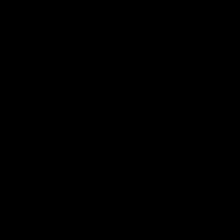

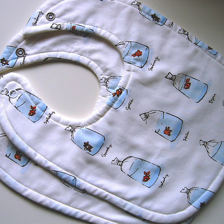

In [239]:
index = 1
print("true_label", ds["test"][index]["label"])
analyse_image(img=ds["test"][index]["image"])

true_label 1
logits:  tf.Tensor([[0.37702823]], shape=(1, 1), dtype=float32)
Predicted class: 0


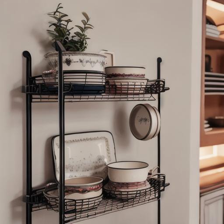

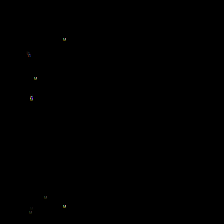

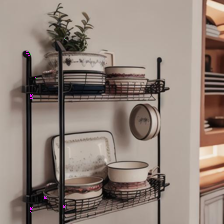

In [240]:
index = 2
print("true_label", ds["test"][index]["label"])
analyse_image(img=ds["test"][index]["image"])

true_label 0
logits:  tf.Tensor([[0.28197947]], shape=(1, 1), dtype=float32)
Predicted class: 0


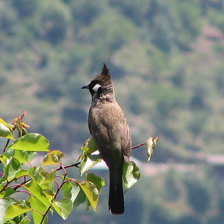

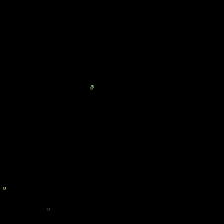

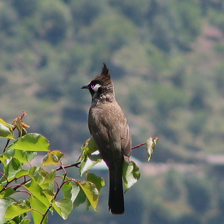

In [241]:
index = 3
print("true_label", ds["test"][index]["label"])
analyse_image(img=ds["test"][index]["image"])

true_label 1
logits:  tf.Tensor([[0.6373942]], shape=(1, 1), dtype=float32)
Predicted class: 1


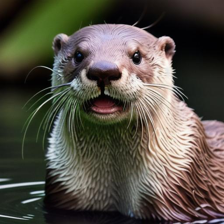

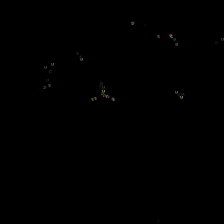

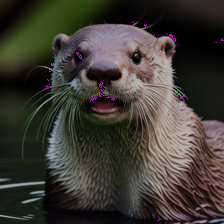

In [242]:
index = 4
print("true_label", ds["test"][index]["label"])
analyse_image(img=ds["test"][index]["image"])

true_label 0
logits:  tf.Tensor([[0.46676868]], shape=(1, 1), dtype=float32)
Predicted class: 0


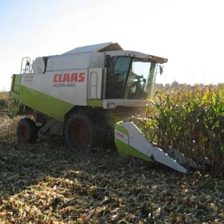

C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:10: RuntimeWarning: divide by zero encountered in divide
  normalized =  absolute * (255.0/absolute.max())
C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:10: RuntimeWarning: invalid value encountered in multiply
  normalized =  absolute * (255.0/absolute.max())
C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:11: RuntimeWarning: invalid value encountered in cast
  integ = normalized.astype(np.uint8)


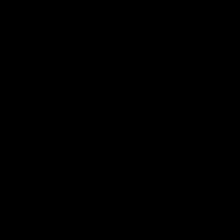

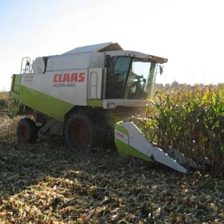

In [243]:
index = 5
print("true_label", ds["test"][index]["label"])
analyse_image(img=ds["test"][index]["image"])

true_label 0
logits:  tf.Tensor([[0.79677236]], shape=(1, 1), dtype=float32)
Predicted class: 1


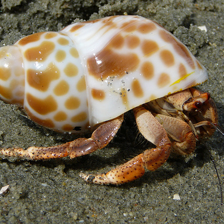

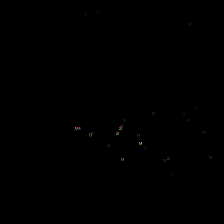

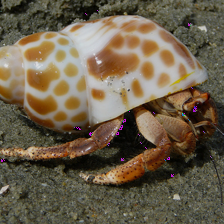

In [244]:
index = 6
print("true_label", ds["test"][index]["label"])
analyse_image(img=ds["test"][index]["image"])

true_label 0
logits:  tf.Tensor([[0.00155496]], shape=(1, 1), dtype=float32)
Predicted class: 0


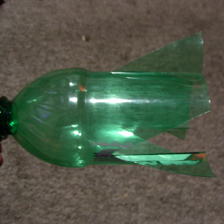

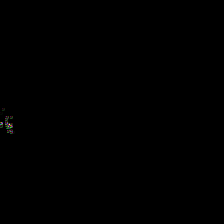

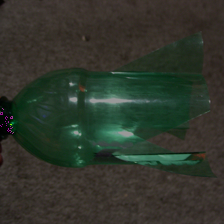

In [245]:
index = 7
print("true_label", ds["test"][index]["label"])
analyse_image(img=ds["test"][index]["image"])

true_label 0
logits:  tf.Tensor([[0.46676868]], shape=(1, 1), dtype=float32)
Predicted class: 0


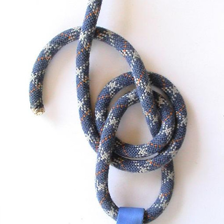

C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:10: RuntimeWarning: divide by zero encountered in divide
  normalized =  absolute * (255.0/absolute.max())
C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:10: RuntimeWarning: invalid value encountered in multiply
  normalized =  absolute * (255.0/absolute.max())
C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:11: RuntimeWarning: invalid value encountered in cast
  integ = normalized.astype(np.uint8)


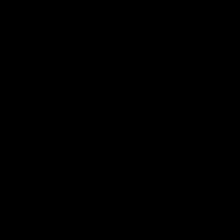

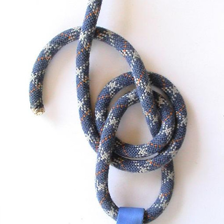

In [246]:
index = 8
print("true_label", ds["test"][index]["label"])
analyse_image(img=ds["test"][index]["image"])

true_label 0
logits:  tf.Tensor([[0.46676868]], shape=(1, 1), dtype=float32)
Predicted class: 0


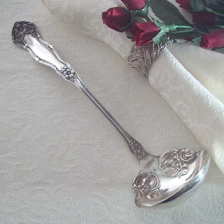

C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:10: RuntimeWarning: divide by zero encountered in divide
  normalized =  absolute * (255.0/absolute.max())
C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:10: RuntimeWarning: invalid value encountered in multiply
  normalized =  absolute * (255.0/absolute.max())
C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:11: RuntimeWarning: invalid value encountered in cast
  integ = normalized.astype(np.uint8)


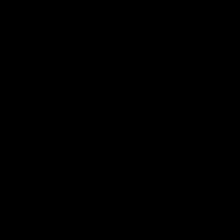

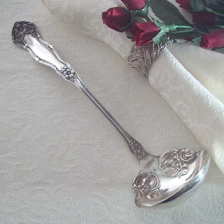

In [247]:
index = 9
print("true_label", ds["test"][index]["label"])
analyse_image(img=ds["test"][index]["image"])

true_label 1
logits:  tf.Tensor([[0.94810754]], shape=(1, 1), dtype=float32)
Predicted class: 1


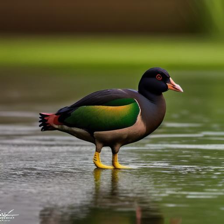

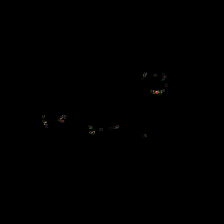

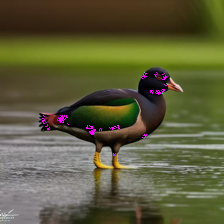

In [248]:
index = 10
print("true_label", ds["test"][index]["label"])
analyse_image(img=ds["test"][index]["image"])

true_label 0
logits:  tf.Tensor([[0.46676868]], shape=(1, 1), dtype=float32)
Predicted class: 0


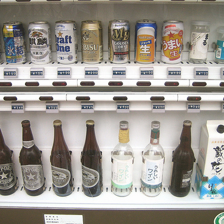

C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:10: RuntimeWarning: divide by zero encountered in divide
  normalized =  absolute * (255.0/absolute.max())
C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:10: RuntimeWarning: invalid value encountered in multiply
  normalized =  absolute * (255.0/absolute.max())
C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:11: RuntimeWarning: invalid value encountered in cast
  integ = normalized.astype(np.uint8)


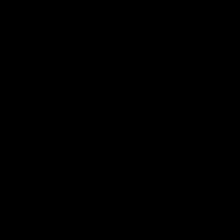

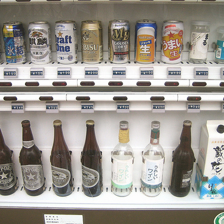

In [249]:
index = 11
print("true_label", ds["test"][index]["label"])
analyse_image(img=ds["test"][index]["image"])

true_label 0
logits:  tf.Tensor([[0.00020239]], shape=(1, 1), dtype=float32)
Predicted class: 0


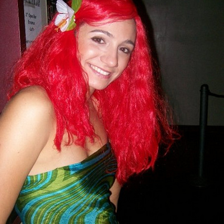

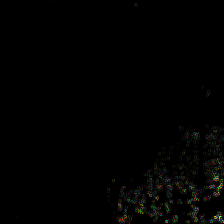

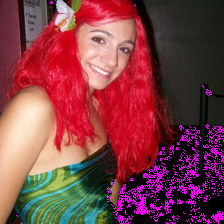

In [251]:
index = 13
print("true_label", ds["test"][index]["label"])
analyse_image(img=ds["test"][index]["image"])

true_label 1
logits:  tf.Tensor([[0.46676868]], shape=(1, 1), dtype=float32)
Predicted class: 0


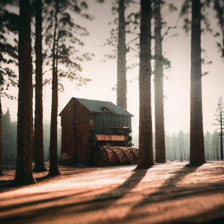

C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:10: RuntimeWarning: divide by zero encountered in divide
  normalized =  absolute * (255.0/absolute.max())
C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:10: RuntimeWarning: invalid value encountered in multiply
  normalized =  absolute * (255.0/absolute.max())
C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:11: RuntimeWarning: invalid value encountered in cast
  integ = normalized.astype(np.uint8)


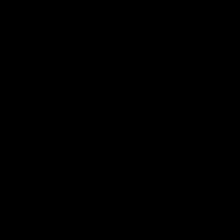

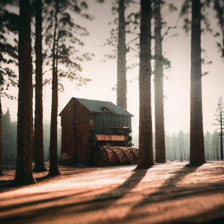

In [252]:
index = 14
print("true_label", ds["test"][index]["label"])
analyse_image(img=ds["test"][index]["image"])

true_label 1
logits:  tf.Tensor([[0.00027459]], shape=(1, 1), dtype=float32)
Predicted class: 0


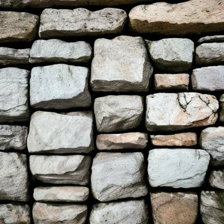

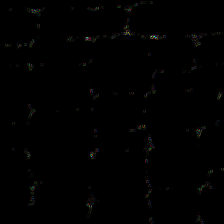

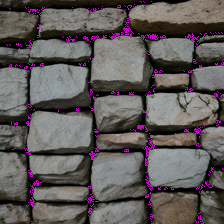

In [253]:
index = 15
print("true_label", ds["test"][index]["label"])
analyse_image(img=ds["test"][index]["image"])

true_label 1
logits:  tf.Tensor([[1.]], shape=(1, 1), dtype=float32)
Predicted class: 1


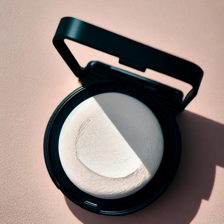

C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:10: RuntimeWarning: divide by zero encountered in divide
  normalized =  absolute * (255.0/absolute.max())
C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:10: RuntimeWarning: invalid value encountered in multiply
  normalized =  absolute * (255.0/absolute.max())
C:\Users\Tim\AppData\Local\Temp\ipykernel_16320\704927919.py:11: RuntimeWarning: invalid value encountered in cast
  integ = normalized.astype(np.uint8)


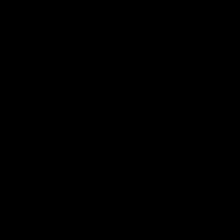

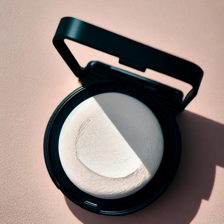

In [254]:
index = 16
print("true_label", ds["test"][index]["label"])
analyse_image(img=ds["test"][index]["image"])

true_label 1
logits:  tf.Tensor([[0.60447896]], shape=(1, 1), dtype=float32)
Predicted class: 1


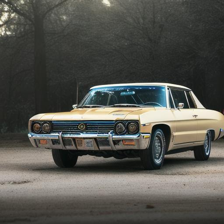

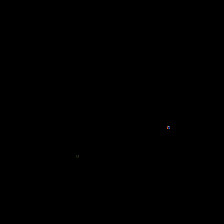

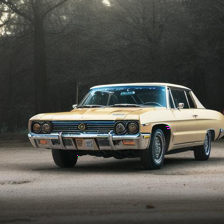

In [255]:
index = 17
print("true_label", ds["test"][index]["label"])
analyse_image(img=ds["test"][index]["image"])

true_label 1
logits:  tf.Tensor([[0.9999976]], shape=(1, 1), dtype=float32)
Predicted class: 1


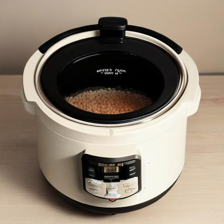

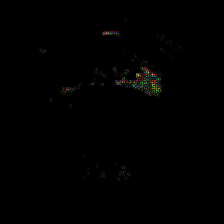

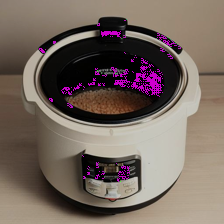

In [256]:
index = 18
print("true_label", ds["test"][index]["label"])
analyse_image(img=ds["test"][index]["image"])

true_label 1
logits:  tf.Tensor([[0.646006]], shape=(1, 1), dtype=float32)
Predicted class: 1


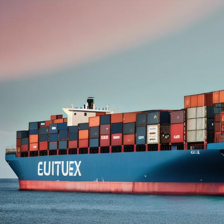

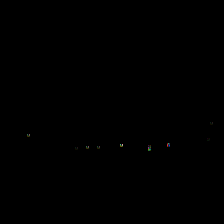

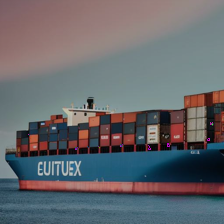

In [257]:
index = 19
print("true_label", ds["test"][index]["label"])
analyse_image(img=ds["test"][index]["image"])

true_label 1
logits:  tf.Tensor([[0.53976965]], shape=(1, 1), dtype=float32)
Predicted class: 1


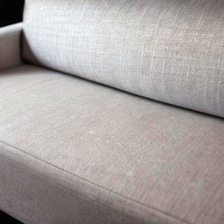

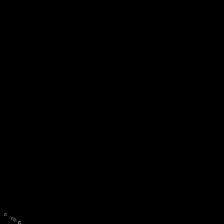

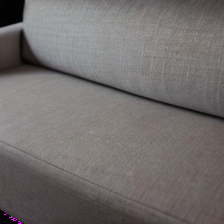

In [258]:
index = 20
print("true_label", ds["test"][index]["label"])
analyse_image(img=ds["test"][index]["image"])

true_label 0
logits:  tf.Tensor([[0.45388785]], shape=(1, 1), dtype=float32)
Predicted class: 0


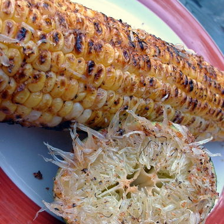

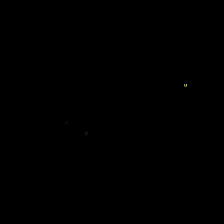

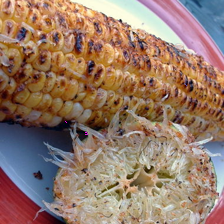

In [259]:
index = 21
print("true_label", ds["test"][index]["label"])
analyse_image(img=ds["test"][index]["image"])

true_label 0
logits:  tf.Tensor([[0.02189087]], shape=(1, 1), dtype=float32)
Predicted class: 0


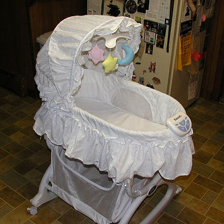

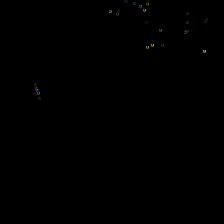

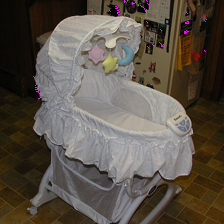

In [260]:
index = 22
print("true_label", ds["test"][index]["label"])
analyse_image(img=ds["test"][index]["image"])